In [30]:
#! /usr/bin/python3
import requests
from bs4 import BeautifulSoup as bs 
import csv

from random import randint
import requests
import pandas as pd
import time
import os
from scrapy.selector import Selector
from parsel import Selector
from flask import Flask, render_template,  session, redirect, request
from flask_cors import CORS,cross_origin
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [35]:
search_term = 'iphone'
url = create_url(search_term, template='flipkart')
page = requests.Session().get(url,headers=headers, proxies={"http": proxy, "https": proxy})
text = page.text
# soup = bs(page_source,'html.parser')

In [36]:
Selector(text=text).xpath('//*[@class="_2WkVRV"]/text()').get()

In [37]:
Selector(text=text).xpath('//*[@class="s1Q9rs"]/text()').get()

In [39]:
Selector(text=text).xpath('//*[@class="_4rR01T"]/text()').get()

In [5]:
import requests
from bs4 import BeautifulSoup as bs 
import csv

from collections import OrderedDict
from random import randint
import random
import requests
import pandas as pd
import time
import os
from flask import Flask, render_template,  session, redirect, request
from flask_cors import CORS,cross_origin
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

from lxml.html import fromstring
from itertools import cycle
import traceback

import copy
from defaultlist import defaultlist
import itertools

# define global paths for Image and csv folders
IMG_FOLDER = os.path.join('static', 'images')
CSV_FOLDER = os.path.join('static', 'CSVs')

#FLASK specific - maybe this is why he is using CORS. So that the origin can be both the web and the folder name.
app = Flask(__name__)
# config environment variables
app.config['IMG_FOLDER'] = IMG_FOLDER
app.config['CSV_FOLDER'] = CSV_FOLDER



def create_url(search_term,template='amazon', page=1):
    """Create a url based on search terms. """
    if template=='amazon':
        template = "https://www.amazon.in/s?k={}&ref=nb_sb_noss_2"
    elif template=='flipkart':
        template = "https://www.flipkart.com/search?q={}&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off"

    if " " in search_term.strip():
        search_term = search_term.strip().replace(" ", "+")
    else:
        search_term = search_term.strip()

    search_term = search_term.replace(" ","+")

    # Inserting query    
    search_url = template.format(search_term)

    # Add provision to travel through different pages
    search_url += '&page={}' 

    return search_url

def  get_headers_and_proxies():

    headers_list = [ 
            {
            'dnt': '1',
            'upgrade-insecure-requests': '1',
            'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Safari/537.36',
            'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
            'sec-fetch-site': 'cross-site',
            'sec-fetch-mode': 'navigate',
            'sec-fetch-user': '?1',
            'sec-fetch-dest': 'document',
            'referer': 'https://www.google.com/',
            'accept-language': 'en-IN,en;q=0.9'
            },
    
            {
            'Connection': 'keep-alive',
            'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Safari/537.36',
            'DNT': '1',
            'Content-Type': 'text/plain;charset=UTF-8',
            'Accept': '*/*',
            'Origin': 'https://www.amazon.in',
            'Referer': 'https://www.google.com/',
            'Accept-Language': 'en-IN,en;q=0.9,en-GB;q=0.8,en-US;q=0.7,bn;q=0.6',
            },
        
        # Firefox 77 Mac
            {
                "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:77.0) Gecko/20100101 Firefox/77.0",
                "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8",
                "Accept-Language": "en-US,en;q=0.5",
                "Referer": "https://www.google.com/",
                "DNT": "1",
                "Connection": "keep-alive",
                "Upgrade-Insecure-Requests": "1"
            },
            # Firefox 77 Windows
            {
                "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:77.0) Gecko/20100101 Firefox/77.0",
                "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8",
                "Accept-Language": "en-US,en;q=0.5",
                "Accept-Encoding": "gzip, deflate, br",
                "Referer": "https://www.google.com/",
                "DNT": "1",
                "Connection": "keep-alive",
                "Upgrade-Insecure-Requests": "1"
            },
            # Chrome 83 Mac
            {
                "Connection": "keep-alive",
                "DNT": "1",
                "Upgrade-Insecure-Requests": "1",
                "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36",
                "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
                "Sec-Fetch-Site": "none",
                "Sec-Fetch-Mode": "navigate",
                "Sec-Fetch-Dest": "document",
                "Referer": "https://www.google.com/",
                "Accept-Encoding": "gzip, deflate, br",
                "Accept-Language": "en-GB,en-US;q=0.9,en;q=0.8"
            },
            # Chrome 83 Windows 
            {
                "Connection": "keep-alive",
                "Upgrade-Insecure-Requests": "1",
                "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36",
                "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
                "Sec-Fetch-Site": "same-origin",
                "Sec-Fetch-Mode": "navigate",
                "Sec-Fetch-User": "?1",
                "Sec-Fetch-Dest": "document",
                "Referer": "https://www.google.com/",
                "Accept-Encoding": "gzip, deflate, br",
                "Accept-Language": "en-US,en;q=0.9"
            }]
    

    ordered_headers_list = []
    #randomly find out headers
    for headers in headers_list:
        h = OrderedDict()
        for header,value in headers.items():
            h[header]=value
        ordered_headers_list.append(h)

    for i in range(1,4):
        #Pick a random browser headers
        headers = random.choice(headers_list)

    #randomly find out proxies
    url = 'https://free-proxy-list.net/'
    response = requests.get(url)
    parser = fromstring(response.text)
    proxies = []
    for i in parser.xpath('//tbody/tr')[:5]:
        if i.xpath('.//td[7][contains(text(),"yes")]'):
            #Grabbing IP and corresponding PORT
            proxy = ":".join([i.xpath('.//td[1]/text()')[0], i.xpath('.//td[2]/text()')[0]])
            proxies.append(proxy)

    return (headers, proxies)

# def extract_flipkart_search_results(driver,search_term,proxy):
def extract_flipkart_search_results(search_term,headers,proxy):
    """Scrape and return relevant data from flipkart."""

    data = {}
    product = defaultlist(lambda: 'empty')
    price = defaultlist(lambda: 'empty')
    rating = defaultlist(lambda: 'empty')
    review_count = defaultlist(lambda: 'empty')
    product_page = defaultlist(lambda: 'empty')
    comments = defaultlist(lambda: 'empty')

    base_url = "https://www.flipkart.com"
    #creating the query term & fetching the requested page
    url = create_url(search_term, template='flipkart')
    
    for page in range(0,2):
        url = url.format(page)
        
        try:
            page = requests.Session().get(url, headers=headers, proxies={"http": proxy, "https": proxy})   
#             page = driver.get(url, proxies={"http": proxy, "https": proxy})
        except:
            page = requests.Session().get(url, headers=headers)
        
        # page = driver.get(url)

        page_source = page.text
        # page_source = driver.page_source
        #create soup object
        soup = bs(page_source,'html.parser')
        
        # prod_urls = soup.find_all('a',{'rel':'noopener noreferrer'})
        prod_urls = defaultlist(lambda:"empty")
        prod_urls.extend(soup.find_all('a',{'rel':'noopener noreferrer'}))
        
        for i in range(10):
            #Controll craw rate
            time.sleep(randint(1,4))
            try:
                if soup.find('div',{'class':'_2WkVRV'}).text != []: 
                    product.append(soup.find_all('div',{'class':'_2WkVRV'})[i].text+'(Flipkart)')

                elif soup.find('a',{'class':'s1Q9rs'})['title'] != []: 
                    product.append(soup.find_all('div',{'class':'s1Q9rs'})[i]['title']+'(Flipkart)')

                elif soup.find('img',{'class':'_396cs4'}).get('alt') != None: 
                    product.append(soup.find_all('div',{'class':'_4rR01T'})[i].text+'(Flipkart)')
            except:
                product.append('')


            #Return the price of an element
            try:
                price.append(soup.find_all('div','_1vC4OE')[i].text)
            except:
                price.append("")

            #Return rating of an element
            try:
                rating.append(soup.find_all('div','hGSR34')[i].text)
            except:
                rating.append("Not rated")

            #Return number of people who rated and reviewed the product
            try:
#                 if soup.find('span',{'class':'_1SMN2T'}) != None:
#                     review_count.append(soup.find_all('span',{'class':'_1SMN2T'})[i].text.split("&")[0])
#                 elif soup.find('span',{'class':'_38sUEc'}).text != None:
                review_count.append(soup.find_all('span',{'class':'_38sUEc'})[i].span.contents[2].text.replace('\xa0',''))
            except:
                review_count.append("No reviews")

            #Return the full product  URL
            prod_url = prod_urls[i]
            
            if prod_url != 'empty':
                prod_page = base_url+str(prod_url['href'])                
                product_page.append(prod_page)
                reviews_url = prod_page.replace('/p/','/product-reviews/') 
                reviews_page = requests.get(reviews_url, headers=headers)
                page_source = reviews_page.text
                soup_rev = bs(page_source,'html.parser')
                #Find all reviews
                rev_results = soup_rev.find_all('div','qwjRop')
                #Extract all the 
                comments.append([i.text.strip().replace('READ MORE','') if (i.text.strip()!='') else
                                 i.text.strip().replace('READ MORE','') if 'READ MORE' in i else i.text 
                                 for i in rev_results])
                
            else:
                product_page.append("No URL")
                comments.append("No comments")


    data['Product'] = product
    data['Price'] = price
    data['Rating'] = rating
    data['Review count'] = review_count
    data['Product page'] = product_page
    data['Comments'] = comments
    
    return data



def execute_scraper_amazon_requests(search_term,headers,proxy):
# def execute_scraper_amazon_requests(driver,search_term,headers,proxy):
    """Run the scraper and display the values as required from amazon. """
    data = {}
    product = defaultlist(lambda: 'empty')
    price = defaultlist(lambda: 'empty')
    rating = defaultlist(lambda: 'empty')
    review_count = defaultlist(lambda: 'empty')
    product_page = defaultlist(lambda: 'empty')
    comments = defaultlist(lambda: 'empty')
      

    base_url = "https://www.amazon.in"
    
    #creating the query term & fetching the requested page
    url = create_url(search_term, 'amazon')
    for page in range(0,2):

        url = url.format(page)
        
        
        try:
            page = requests.Session().get(url, headers=headers, proxies={"http": proxy, "https": proxy})      
            # page = driver.get(url, headers=headers, proxies={"http": proxy, "https": proxy})      
        except:
            page = requests.Session().get(url, headers=headers)
            # page = driver.get(url, headers=headers)#, proxies={"http": proxy, "https": proxy})
        # page =driver.get(url)
        page_source = page.text
        # page_source = driver.page_source
        soup = bs(page_source,'html.parser')
#         soup = create_soup_object(url)
#         results_a = remove_ads(soup)
    
        results = soup.find_all('div',{'data-component-type':'s-search-result'})
        ads = soup.find_all('div','AdHolder')
        #removing ads
        for i in results:
            if ads != []:
                if i in ads:
                    results.remove(i)
            else:
                break

        time.sleep(randint(1,4))
        
        
        for item in results[0:10]:
            tag = item.h2.a
            #Item name
            # if all(i in tag.text.split(' ') for i in search_string.replace("+"," ").split(' ')):
            #     product.append(tag.text.strip()+' (Amazon)')
            # else:
            #     pass
            
            product.append(tag.text.strip()+' (Amazon)')
            
            product_url = base_url+tag.get('href')
            
            #Item URL
            product_page.append(product_url)

            try:
                price_parent = item.find('span','a-price')
                #Item price
                price.append(price_parent.find('span','a-offscreen').text)
            except:
                price.append("No price")

            try:    
                #Item rating
                rating.append(item.i.text)
            except:
                rating.append("No ratings")
            

            try:    
                #Item review countif record:
                review_count.append(item.find("span",{"class":"a-size-base", "dir":"auto"}).text)
            except:
                review_count.append("No reviews")

            reviews_link = product_url.replace('dp','product-reviews').replace('?dchild=1','/reviewerType=all_reviews')

            page_rev = requests.get(reviews_link, headers=headers)
            page_rev_source = page_rev.text
            soup_rev = bs(page_rev_source,'html.parser')
            
            # try:
            comments.append([i.text.strip() if i.text.strip()!='' else "No user comments yet" for i in soup_rev.find_all('span',{'data-hook':'review-body'})])
            # except:
            #     comments.append("No user comments yet")
    
    data['Product'] = product
    data['Price'] = price
    data['Rating'] = rating
    data['Review count'] = review_count
    data['Product page'] = product_page
    data['Comments'] = comments

    return data

def save_as_dataframe(dataframe, fileName):
    # save the CSV file to CSVs folder
    csv_path = os.path.join(app.config['CSV_FOLDER'],fileName)
    fileExtension = '.csv'
    final_path = f"{csv_path}{fileExtension}"
    # clean previous files -
    # clear_cache(directory=app.config['CSV_FOLDER'])
    # save new csv to the csv folder
    dataframe.to_csv(final_path,index=False)
    print("File has been successfully saved!")

    return final_path

def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

#Create a wordcloud and save the same in the IMG_FOLDER. Clear the previous searched wordcloud image from the folder.
def save_wordcloud_image(file, img_filename):#, site):
    # extract all the comments
    txt = " ".join(review for review in file)
    # txt = dataframe["Comments"].values
#     print(txt)
    try:
        # generate the wordcloud
        # mask = np.array(Image.open('static/background/cloud.png'))
        # transformed_mask = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)

        # for i in range(len(mask)):
        #     transformed_mask[i] = list(map(transform_format, mask[i]))

        # font_path = 'static/background/font/Pumpkin Soup.ttf'
        mask = np.array(Image.open('/home/deep/Desktop/Scraping project/ecommerce_scraper/static/background/cloud.png'))
        wc = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(str(txt))
        plt.figure(figsize=(20,10), facecolor='k', edgecolor='k')
        plt.imshow(wc, interpolation='bilinear') 
        plt.axis('off')
        plt.tight_layout()

#         image_path = os.path.join(app.config['IMG_FOLDER'], img_filename + '.png')
        # if site == 'Amazon':
        #     # create path to save wc image
        #     image_path = os.path.join(app.config['IMG_FOLDER'], img_filename + '_Amazon' + '.png')
        # else:
        #     image_path = os.path.join(app.config['IMG_FOLDER'], img_filename + '_Flipkart' + '.png')
        # save the image file to the image path
#         plt.savefig(image_path)
#         plt.close()
        print("wc")
    except:
        pass



#Clear the image and the csv files from their respective directories.

def clear_cache():
    # only proceed if directory is not empty
    directory=[app.config['IMG_FOLDER'],app.config['CSV_FOLDER']]
    for i in directory:
        if os.listdir(i) != []:
            # iterate over the files and remove each file
            files = os.listdir(i)
            for fileName in files:
                print(fileName)
                os.remove(os.path.join(i,fileName))
        print("cleaned!")


In [196]:
proxies

['161.202.226.194:8123']

In [238]:
BK_FOLDER = os.path.join('static', 'background')
app.config['BK_FOLDER'] = BK_FOLDER
app.config['IMG_FOLDER']

'static/images'

In [122]:
import os
k =  [i  for i in os.listdir('/home/deep/Desktop/Scraping project/ecommerce_scraper/static/images') if "(Amazon)" in i ]
for i in os.listdir('/home/deep/Desktop/Scraping project/ecommerce_scraper/static/images'):
    if "(Amazon)" in i:
        print("yes")
k

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


['Apple iPhone\xa07 (32GB) - Silver (Amazon).png',
 'Apple iPhone 11 (128GB) - White (Includes EarPods, Power Adapter) (Amazon).png',
 'OnePlus Nord 5G (Blue Marble, 12GB RAM, 256GB Storage) (Amazon).png',
 'CASEME Dark Series Back Cover for iPhone x, Back Cover for iPhone Xs - Heavy-Duty Drop Protection with Kickstand Included Belt Clip Holster - 5.8" Black (Amazon).png',
 'Apple iPhone 8 (128GB) - Gold (Amazon).png',
 'Apple iPhone 11 (64GB) - (Product) RED (Includes EarPods, Power Adapter) (Amazon).png',
 'Samsung Galaxy M31 (Ocean Blue, 6GB RAM, 128GB Storage) - Get Flat Rs 2,500 Instant Discount with select bank cards - Limited Period Offer (Amazon).png',
 'Apple iPhone 7 (32GB) - Gold (Amazon).png',
 'Apple iPhone 7 (32GB) - Black (Amazon).png',
 'Apple iPhone\xa07 (32GB) - Rose Gold (Amazon).png',
 'Apple iPhone 11 (64GB) - Black (Includes EarPods, Power Adapter) (Amazon).png',
 'OnePlus 7T Glacier Blue (8GB RAM+256GB Storage) (Amazon).png',
 'Apple iPhone\xa07 Plus (32GB) - Bla

In [3]:
print(STOPWORDS)

{'nor', 'theirs', 'other', 'themselves', 'while', 'were', 'below', 'off', 'shall', 'with', 'through', "weren't", 'about', 'i', "here's", 'those', 'www', 'too', 'under', "you're", 'both', 'has', "he's", "you'd", 'them', "mustn't", 'otherwise', 'his', 'be', 'on', 'doing', 'by', 'as', 'me', 'ours', 'most', 'would', 'over', "aren't", 'else', 'each', 'an', "hadn't", 'him', 'like', 'get', 'am', 'between', "we'll", 'own', "i've", "isn't", 'all', "she's", 'did', 'a', 'what', "they've", "how's", 'these', 'then', 'she', 'since', 'having', 'once', 'when', 'being', 'itself', 'you', 'been', 'himself', 'are', 'above', 'before', 'no', 'ever', 'my', "he'd", 'such', 'therefore', 'yourself', 'some', 'com', "don't", 'k', 'its', "you've", "wouldn't", 'more', 'yourselves', 'same', "we're", "shouldn't", 'http', "why's", 'in', 'hers', 'after', "there's", "they'll", 'had', 'however', 'their', 'have', 'so', 'out', "who's", 'myself', 'or', 'for', "what's", 'the', "she'd", 'at', "can't", 'our', "they'd", 'hence'

In [5]:
import nltk
from nltk.corpus import stopwords
s=set(stopwords.words('english'))

In [9]:
len(STOPWORDS)

227

In [8]:
STOPWORDS.update(s)

In [146]:
[i if "(Flipkart)" in i else "empty" for i in os.listdir(app.config['IMG_FOLDER'])]

['Apple iPhone SE (White, 256 GB)(Flipkart).png',
 'Apple iPhone SE (Red, 128 GB)(Flipkart).png',
 'Apple iPhone SE (Red, 64 GB)(Flipkart).png',
 'Apple iPhone SE (White, 64 GB)(Flipkart).png',
 'Apple iPhone SE (Black, 64 GB)(Flipkart).png',
 'Apple iPhone SE (White, 128 GB)(Flipkart).png',
 'Apple iPhone SE (Black, 128 GB)(Flipkart).png',
 'Apple iPhone SE (Red, 256 GB)(Flipkart).png',
 'Apple iPhone SE (Black, 256 GB)(Flipkart).png']

In [162]:
# [f'<a target="_blank" href="static/images/{j}">{i}</a>' ]                    
flip_copy_img

['Apple iPhone SE (White, 256 GB)(Flipkart).png',
 'Apple iPhone SE (Red, 128 GB)(Flipkart).png',
 'Apple iPhone SE (Red, 64 GB)(Flipkart).png',
 'Apple iPhone SE (White, 64 GB)(Flipkart).png',
 'Apple iPhone SE (Black, 64 GB)(Flipkart).png',
 'Apple iPhone SE (White, 128 GB)(Flipkart).png',
 'Apple iPhone SE (Black, 128 GB)(Flipkart).png',
 'Apple iPhone SE (Red, 256 GB)(Flipkart).png',
 'Apple iPhone SE (Black, 256 GB)(Flipkart).png']

In [169]:
flip_copy['Review count']

['<a target="_blank" href="static/images/Apple iPhone SE (Black, 64 GB)(Flipkart)">4,800 Reviews</a>',
 '<a target="_blank" href="static/images/Apple iPhone SE (White, 64 GB)(Flipkart)">4,800 Reviews</a>',
 '<a target="_blank" href="static/images/Apple iPhone SE (Black, 128 GB)(Flipkart)">4,800 Reviews</a>',
 '<a target="_blank" href="static/images/Apple iPhone SE (Red, 64 GB)(Flipkart)">4,800 Reviews</a>',
 '<a target="_blank" href="static/images/Apple iPhone SE (White, 128 GB)(Flipkart)">4,800 Reviews</a>',
 '<a target="_blank" href="static/images/Apple iPhone SE (Red, 128 GB)(Flipkart)">4,800 Reviews</a>',
 '<a target="_blank" href="static/images/Apple iPhone SE (Black, 256 GB)(Flipkart)">4,800 Reviews</a>',
 '<a target="_blank" href="static/images/Apple iPhone SE (White, 256 GB)(Flipkart)">4,800 Reviews</a>',
 '<a target="_blank" href="static/images/Apple iPhone SE (Red, 256 GB)(Flipkart)">4,800 Reviews</a>',
 'No reviews',
 '<a target="_blank" href="static/images/Apple iPhone SE (

In [167]:
for i,j in zip(flip_copy['Review count'],flipkart_data['Product']):
    if j+'.png' in flip_copy_img:
        print('y')
    else:
        print('n')

Apple iPhone SE (Black, 64 GB)(Flipkart).png
y
Apple iPhone SE (White, 64 GB)(Flipkart).png
y
Apple iPhone SE (Black, 128 GB)(Flipkart).png
y
Apple iPhone SE (Red, 64 GB)(Flipkart).png
y
Apple iPhone SE (White, 128 GB)(Flipkart).png
y
Apple iPhone SE (Red, 128 GB)(Flipkart).png
y
Apple iPhone SE (Black, 256 GB)(Flipkart).png
y
Apple iPhone SE (White, 256 GB)(Flipkart).png
y
Apple iPhone SE (Red, 256 GB)(Flipkart).png
y
.png
n
Apple iPhone SE (Black, 64 GB)(Flipkart).png
y
Apple iPhone SE (White, 64 GB)(Flipkart).png
y
Apple iPhone SE (Black, 128 GB)(Flipkart).png
y
Apple iPhone SE (Red, 64 GB)(Flipkart).png
y
Apple iPhone SE (White, 128 GB)(Flipkart).png
y
Apple iPhone SE (Red, 128 GB)(Flipkart).png
y
Apple iPhone SE (Black, 256 GB)(Flipkart).png
y
Apple iPhone SE (White, 256 GB)(Flipkart).png
y
Apple iPhone SE (Red, 256 GB)(Flipkart).png
y
.png
n


In [168]:
flip_copy['Review count'] = [f'<a target="_blank" href="static/images/{j}">{i}</a>' if j+'.png' in flip_copy_img else i for i,j in zip(flip_copy['Review count'],flipkart_data['Product'])]
<a href=f"/show/{j+".png"}">
f'<a href="/show/{j+".png"}">{i}</a>' if j+".png" in amaz_copy_img else i for i,j in zip(data['Review count'],data['Product'])

In [257]:
for i,j in zip(range(len(amaz_copy['Review count'])),range(len(amaz_copy['Product']))):
    if amaz_copy['Product'][j]+".png" in amaz_copy_img:
        e = amaz_copy['Product'][j]
        f = amaz_copy['Review count'][i]
        amaz_copy['Review count'][i] = f'<a href="/show/{e+".png"}" target="_blank">{f}</a>'
    else:
        amaz_copy['Review count'][i] = amaz_copy['Review count'][i]

In [258]:
amaz_copy['Review count']

['<a href="/show/Apple iPhone 7 (32GB) - Black (Amazon).png" target="_blank">4,662</a>',
 '<a href="/show/Apple iPhone 11 (64GB) - White (Includes EarPods, Power Adapter) (Amazon).png" target="_blank">9,126</a>',
 '23',
 '1',
 '<a href="/show/Spigen, 1 Pack, iPhone SE 2020 Tempered Glass Screen Protector, AlignMaster [No Lifting] Auto-Align Technology, Edge to Edge Full Screen Coverage, Screen Guard for Apple iPhone New SE 2nd Gen (Amazon).png" target="_blank">1,002</a>',
 'by ',
 'No reviews',
 '<a href="/show/Wellpoint Designedfor| iPhone se 2020 Armor case Apple Armour Silicone Back Cover Transparent Bumper Covers Cases Protector Silicon Pouch Rubber Rugged Skin Ultra Thin backcover se2 (Dia Black) (Amazon).png" target="_blank">12</a>',
 '<a href="/show/LUZWE® Super Fast Charging Cable & High Speed Data Sync USB Cable Compatible for iPhone SE 2020 11 11pro 11pro Max X XS XS MAX XR 8 8Plus 7 7 Plus 6 6 Plus 5 iPad All iOS Devices. (Amazon).png" target="_blank">11</a>',
 '<a href="/sh

In [297]:
review = []
for i,j in zip(flip_copy['Review count'],flip_copy['Product']):
    if j+".png" in flip_copy_img:
        review.append(f'<a href="/show/{j}.png">{i}</a>')
    else:
        review.append(i)
review

['<a href="/show/Apple iPhone SE (Black, 64 GB) (Includes EarPods, Power Adapter)(Flipkart).png">5,018 Reviews</a>',
 '<a href="/show/Apple iPhone SE (White, 64 GB) (Includes EarPods, Power Adapter)(Flipkart).png">5,018 Reviews</a>',
 '<a href="/show/Apple iPhone SE (Red, 64 GB) (Includes EarPods, Power Adapter)(Flipkart).png">5,018 Reviews</a>',
 '<a href="/show/Apple iPhone SE (Black, 128 GB) (Includes EarPods, Power Adapter)(Flipkart).png">5,018 Reviews</a>',
 '<a href="/show/Apple iPhone SE (Red, 128 GB) (Includes EarPods, Power Adapter)(Flipkart).png">5,018 Reviews</a>',
 '<a href="/show/Apple iPhone SE (White, 128 GB) (Includes EarPods, Power Adapter)(Flipkart).png">5,018 Reviews</a>',
 '<a href="/show/Apple iPhone SE (Black, 256 GB) (Includes EarPods, Power Adapter)(Flipkart).png">5,018 Reviews</a>',
 '<a href="/show/Apple iPhone SE (Red, 256 GB) (Includes EarPods, Power Adapter)(Flipkart).png">5,018 Reviews</a>',
 '<a href="/show/Apple iPhone SE (White, 256 GB) (Includes EarPod

In [304]:
h = 4
print(f'my age {h}')

my age 4


In [301]:
z_copy = copy.deepcopy(flip_copy)
z_copy['Review count'] = [f'<a href="/show/{j}.png">{i}</a>' if j+".png" in flip_copy_img else i for i,j in zip(flip_copy['Review count'],flip_copy['Product'])]
z_copy['Review count']

['<a href="/show/Apple iPhone SE (Black, 64 GB) (Includes EarPods, Power Adapter)(Flipkart).png">5,018 Reviews</a>',
 '<a href="/show/Apple iPhone SE (White, 64 GB) (Includes EarPods, Power Adapter)(Flipkart).png">5,018 Reviews</a>',
 '<a href="/show/Apple iPhone SE (Red, 64 GB) (Includes EarPods, Power Adapter)(Flipkart).png">5,018 Reviews</a>',
 '<a href="/show/Apple iPhone SE (Black, 128 GB) (Includes EarPods, Power Adapter)(Flipkart).png">5,018 Reviews</a>',
 '<a href="/show/Apple iPhone SE (Red, 128 GB) (Includes EarPods, Power Adapter)(Flipkart).png">5,018 Reviews</a>',
 '<a href="/show/Apple iPhone SE (White, 128 GB) (Includes EarPods, Power Adapter)(Flipkart).png">5,018 Reviews</a>',
 '<a href="/show/Apple iPhone SE (Black, 256 GB) (Includes EarPods, Power Adapter)(Flipkart).png">5,018 Reviews</a>',
 '<a href="/show/Apple iPhone SE (Red, 256 GB) (Includes EarPods, Power Adapter)(Flipkart).png">5,018 Reviews</a>',
 '<a href="/show/Apple iPhone SE (White, 256 GB) (Includes EarPod

In [294]:
flip_copy['Review count']

['5,018 Reviews',
 '5,018 Reviews',
 '5,018 Reviews',
 '5,018 Reviews',
 '5,018 Reviews',
 '5,018 Reviews',
 '5,018 Reviews',
 '5,018 Reviews',
 '5,018 Reviews',
 'No reviews',
 '5,018 Reviews',
 '5,018 Reviews',
 '5,018 Reviews',
 '5,018 Reviews',
 '5,018 Reviews',
 '5,018 Reviews',
 '5,018 Reviews',
 '5,018 Reviews',
 '5,018 Reviews',
 'No reviews']

In [287]:
a_string = '"ab"cd"'

stripped_string = a_string.strip('"').replace('"','')
print(stripped_string)
print(str(stripped_string))

abcd
abcd


In [246]:
url = 'https://free-proxy-list.net/'
response = requests.get(url)
parser = fromstring(response.text)
proxies = list()
for i in parser.xpath('//tbody/tr')[:11]:
    if i.xpath('.//td[7][contains(text(),"yes")]'):
        #Grabbing IP and corresponding PORT
        proxy = ":".join([i.xpath('.//td[1]/text()')[0], i.xpath('.//td[2]/text()')[0]])
        print(proxy)
        proxies.append(proxy)
proxies

103.83.36.122:3838
78.110.174.55:8080
47.91.89.159:3128


['103.83.36.122:3838', '78.110.174.55:8080', '47.91.89.159:3128']

In [14]:
from nltk.corpus import stopwords
s=set(stopwords.words('english'))

txt="a long string of text about him and her"
# print (list(filter(lambda w: not w in s,txt.split())))
s.update(search_string.split("+"))
print(s)
# import nltk
# nltk.download('stopwords')

{'ma', 'nor', 'me', 'very', 'd', 'between', 'will', 'itself', "should've", 'not', 'needn', "won't", 've', "needn't", "it's", 'who', 'those', 'yours', 'it', 'their', 'aren', 'under', 'which', 'an', "haven't", 'did', 'has', 'against', 'yourself', 's', 'm', 'again', 'you', "mightn't", 'there', 't', 'that', 'all', 'shouldn', "hadn't", 'is', 'of', 'where', 'most', 'after', 'themselves', 'being', 'in', "aren't", 'how', 'out', 'during', 'se', 'he', 'why', 'so', 'once', 'both', 'before', 'as', "she's", 'same', 'hers', 'some', "doesn't", 'weren', 'shan', 'couldn', "shan't", 'be', 'doesn', 'up', 'or', 'further', 'because', 'few', 'on', 'doing', 'here', 'to', 'll', 're', 'hadn', 'his', 'y', 'the', 'at', 'this', "weren't", 'won', 'ourselves', 'were', 'your', 'off', 'when', 'isn', 'didn', 'our', 'been', 'am', 'they', 'than', 'her', 'ours', 'does', "wouldn't", "shouldn't", "wasn't", 'while', 'and', 'with', "you'll", "hasn't", 'was', "didn't", 'these', 'do', "couldn't", 'only', 'hasn', 'we', 'my', "m

In [21]:
search_string = 'iphone Se'
search_string = search_string.strip().replace(" ", "+")

s.update([i.upper() for i in search_string.split("+")])
s.update(['JoMAMA'])
sr = set()
sr.update([i.upper() for i in search_string.split("+")])
sr.update(['NIGGA','NIGOUR','NAGOUR'])
sr

{'IPHONE', 'NAGOUR', 'NIGGA', 'NIGOUR', 'SE'}

In [6]:
# import itertools
import copy
import concurrent.futures
import multiprocessing
search_string = 'iphone se'
# text = request.form['text']

if " " in search_string.strip():
    search_string = search_string.strip().replace(" ", "+")
else:
    search_string = search_string.strip()

print('processing...')

headers, proxies = get_headers_and_proxies()
try:
    proxy = proxies[randint(1,3)]
except:
    proxy = proxies

start = time.perf_counter()

# flip = multiprocessing.Process(target=extract_flipkart_search_results, args=[search_string,headers,proxy])
# amaz = multiprocessing.Process(target=execute_scraper_amazon_requests, args=[search_string,headers,proxy])

# flip.start()
# amaz.start()

# flip.join()
# amaz.join()
#THIS WORKS FINE:
# with concurrent.futures.ThreadPoolExecutor() as executor:
#     flipkart_exec = executor.submit(extract_flipkart_search_results,search_string,headers,proxy)
#     flipkart_data = flipkart_exec.result()
#     amazon_exec = executor.submit(execute_scraper_amazon_requests,search_string,headers,proxy)
#     amazon_data = amazon_exec.result()
    
    
print('check1')
print('check2')

# #Scrape results first
# # amazon_data = execute_scraper_amazon_requests(driver,search_string, headers, proxy)
# amazon_data = execute_scraper_amazon_requests(search_string, headers, proxy)
# print('check3')
# flipkart_data = extract_flipkart_search_results(driver,search_string, headers, proxy)
flipkart_data = extract_flipkart_search_results(search_string, headers, proxy)
print('check4')


flip_copy = copy.deepcopy(flipkart_data)
# amaz_copy = copy.deepcopy(amazon_data)

# #Flipkart block

# with concurrent.futures.ProcessPoolExecutor() as executor:
#     for i,j in zip(flipkart_data['Comments'],flipkart_data['Product']):
#     executor.map(lambda x,y:save_wordcloud_image(x, y,search_string), flipkart_data['Comments'],flipkart_data['Product'])
#     executor.map(lambda x,y:save_wordcloud_image(x, y,search_string), flipkart_data['Comments'],flipkart_data['Product'])

# #build wordcloud
# for i,j in zip(flipkart_data['Comments'],flipkart_data['Product']):
#     save_wordcloud_image(file=i, img_filename=j,search_string=search_string)
# print('check5')

# for i,j in zip(amazon_data['Comments'],amazon_data['Product']):
#     save_wordcloud_image(file=i, img_filename=j,search_string=search_string)
# print('check6')


# #Edit the reviews and embed the link to the reviews wordcloud
# flip_copy_img = [i if "(Flipkart)" in i  else "" for i in os.listdir(app.config['IMG_FOLDER']) ]

# flip_copy['Review count'] = [f'<a href="/show/{j}.png" target="_blank">{i}</a>' if j+".png" in flip_copy_img else i for i,j in zip(flip_copy['Review count'],flip_copy['Product'])]

# #Edit Product with page url
# flip_copy['Product'] = [f'<a target="_blank" href="{j}">{i}</a>' for i,j in zip(flip_copy['Product'],flip_copy['Product page'])]


# #Filtering values
# flip_copy.pop('Comments') #remove comments
# flip_copy.pop('Product page') ##remove product url


# #Dataframe to be visualised
# flipkart_df = pd.DataFrame.from_dict(flip_copy)
# print('check7')


# #Amazon block

# #Edit the reviews and embed the link to the reviews wordcloud
# amaz_copy_img = [i for i in os.listdir(app.config['IMG_FOLDER']) if "(Amazon)" in i ]

# amaz_copy['Review count'] = [f'<a href="/show/{j}.png" target="_blank">{i}</a>' if j+".png" in amaz_copy_img else i for i,j in zip(amaz_copy['Review count'],amaz_copy['Product'])]
# #Edit Product with page url
# amaz_copy['Product'] = [f'<a target="_blank" href="{j}">{i}</a>' for i,j in zip(amaz_copy['Product'],amaz_copy['Product page'])]


# #Filtering or removing values
# amaz_copy.pop('Comments') #remove comments
# amaz_copy.pop('Product page') ##remove product url

# #Dataframe to be visualised
# amazon_df = pd.DataFrame.from_dict(amaz_copy)
# print('check8')        


# #Dataframes to be saved
# amaz_df=pd.DataFrame.from_dict(amazon_data)
# flip_df=pd.DataFrame.from_dict(flipkart_data)


# download_path_a = save_as_dataframe(amaz_df,fileName=(search_string.replace("+", "_")+'_Amazon'))


# download_path_f = save_as_dataframe(flip_df,fileName=(search_string.replace("+", "_")+'_Flipkart'))
# print('check9')        

finish = time.perf_counter()
print(f"program finished with and timelapsed: {finish - start} second(s)")

processing...
check1
check2
check4
program finished with and timelapsed: 71.61869330100035 second(s)


In [7]:
flipkart_data

{'Product': ['',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 'Price': ['',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 'Rating': ['Not rated',
  'Not rated',
  'Not rated',
  'Not rated',
  'Not rated',
  'Not rated',
  'Not rated',
  'Not rated',
  'Not rated',
  'Not rated',
  'Not rated',
  'Not rated',
  'Not rated',
  'Not rated',
  'Not rated',
  'Not rated',
  'Not rated',
  'Not rated',
  'Not rated',
  'Not rated'],
 'Review count': ['No reviews',
  'No reviews',
  'No reviews',
  'No reviews',
  'No reviews',
  'No reviews',
  'No reviews',
  'No reviews',
  'No reviews',
  'No reviews',
  'No reviews',
  'No reviews',
  'No reviews',
  'No reviews',
  'No reviews',
  'No reviews',
  'No reviews',
  'No reviews',
  'No reviews',
  'No reviews'],
 'Product page': ['https://www.flipkart.com/apple-iphone-se-black-64-gb-includes-earpods-p

In [74]:
flip

<Process name='Process-19' pid=27978 parent=17582 stopped exitcode=0>

In [128]:
# template = "https://www.flipkart.com/search?q={}&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off"

search_string = 'iphone se'
# text = request.form['text']

if " " in search_string.strip():
    search_string = search_string.strip().replace(" ", "+")
else:
    search_string = search_string.strip()
print(search_string)
print('processing...')
start = time.perf_counter()

# get_data = DataCollection()

# search_page = get_data.create_url(template='flipkart', search_term = search_string)

# amazon_data = execute_scraper_amazon_requests(search_string)
flipkart_data = extract_flipkart_search_results(search_string)

flip_df = pd.DataFrame.from_dict(flipkart_data)
# amaz_df = pd.DataFrame.from_dict(amazon_data)
# download_path = save_as_dataframe(df, fileName=search_string.replace("+", "_"))

# amaz_df['Comments'].values
# try:
# get_data.save_wordcloud_image(df, img_filename=search_string.replace("+", "_"))
# except:
#     pass
finish = time.perf_counter()
print(f"program finished with and timelapsed: {finish - start} second(s)")
flip_df


In [60]:
import bs4
def execute_scraper_amazon_requests_spl(search_term,headers,proxy):
# def execute_scraper_amazon_requests(driver,search_term,headers,proxy):
    """Run the scraper and display the values as required from amazon. """
    data = {}
    product = defaultlist(lambda: 'empty')
    price = defaultlist(lambda: 'empty')
    rating = defaultlist(lambda: 'empty')
    review_count = defaultlist(lambda: 'empty')
    product_page = defaultlist(lambda: 'empty')
    comments = defaultlist(lambda: 'empty')
      

    base_url = "https://www.amazon.in"
    
    #creating the query term & fetching the requested page
    url = create_url(search_term, 'amazon')
    for page in range(0,2):

        url = url.format(page)
        
        
        try:
            page = requests.Session().get(url, headers=headers, proxies={"http": proxy, "https": proxy})      
            # page = driver.get(url, headers=headers, proxies={"http": proxy, "https": proxy})      
        except:
            page = requests.Session().get(url, headers=headers)
            # page = driver.get(url, headers=headers)#, proxies={"http": proxy, "https": proxy})
        # page =driver.get(url)
        page_source = page.text
        # page_source = driver.page_source
        soup = bs(page_source,'html.parser')
#         soup = create_soup_object(url)
#         results_a = remove_ads(soup)
    
        results = soup.find_all('div',{'data-component-type':'s-search-result'})
        ads = soup.find_all('div','AdHolder')
        #removing ads
        for i in results:
            if ads != []:
                if i in ads:
                    results.remove(i)
            else:
                break

        time.sleep(randint(1,4))
        
        with concurrent.futures.ThreadPoolExecutor() as executor:
            for item in results[0:10]:
                tag = item.h2.a
                #Item name
                # if all(i in tag.text.split(' ') for i in search_string.replace("+"," ").split(' ')):
                #     product.append(tag.text.strip()+' (Amazon)')
                # else:
                #     pass
                
#                 temp = executor.submit(bs4.element.Tag.text.str.strip()+'(Amazon)', tag)
                product.append(tag.text.strip()+' (Amazon)')
                print(type(tag))
                print(type(tag.text))
#                 product.append(temp.result())

                product_url = base_url+tag.get('href')

                #Item URL
                product_page.append(product_url)

                try:
                    price_parent = item.find('span','a-price')
                    #Item price
                    price.append(price_parent.find('span','a-offscreen').text)
                except:
                    price.append("No price")

                try:    
                    #Item rating
                    rating.append(item.i.text)
                except:
                    rating.append("No ratings")


                try:    
                    #Item review countif record:
                    review_count.append(item.find("span",{"class":"a-size-base", "dir":"auto"}).text)
                except:
                    review_count.append("No reviews")

                reviews_link = product_url.replace('dp','product-reviews').replace('?dchild=1','/reviewerType=all_reviews')

                page_rev = requests.get(reviews_link, headers=headers)
                page_rev_source = page_rev.text
                soup_rev = bs(page_rev_source,'html.parser')

                # try:
                comments.append([i.text.strip() if i.text.strip()!='' else "No user comments yet" for i in soup_rev.find_all('span',{'data-hook':'review-body'})])
                # except:
                #     comments.append("No user comments yet")
    
    data['Product'] = product
    data['Price'] = price
    data['Rating'] = rating
    data['Review count'] = review_count
    data['Product page'] = product_page
    data['Comments'] = comments

    return data


In [61]:
amazon_data = execute_scraper_amazon_requests_spl(search_string, headers, proxy)

<class 'bs4.element.Tag'>
<class 'str'>
<class 'bs4.element.Tag'>
<class 'str'>
<class 'bs4.element.Tag'>
<class 'str'>
<class 'bs4.element.Tag'>
<class 'str'>
<class 'bs4.element.Tag'>
<class 'str'>
<class 'bs4.element.Tag'>
<class 'str'>
<class 'bs4.element.Tag'>
<class 'str'>
<class 'bs4.element.Tag'>
<class 'str'>
<class 'bs4.element.Tag'>
<class 'str'>
<class 'bs4.element.Tag'>
<class 'str'>
<class 'bs4.element.Tag'>
<class 'str'>
<class 'bs4.element.Tag'>
<class 'str'>
<class 'bs4.element.Tag'>
<class 'str'>
<class 'bs4.element.Tag'>
<class 'str'>
<class 'bs4.element.Tag'>
<class 'str'>
<class 'bs4.element.Tag'>
<class 'str'>
<class 'bs4.element.Tag'>
<class 'str'>
<class 'bs4.element.Tag'>
<class 'str'>
<class 'bs4.element.Tag'>
<class 'str'>
<class 'bs4.element.Tag'>
<class 'str'>


In [100]:
flip_copy.keys()

dict_keys(['Product', 'Price', 'Rating', 'Review count'])

In [ ]:
flipkart_data[]r i in range(10) for j in range(2)

In [80]:
amaz_df[1:]

,Product,Price,Rating,Review count,Image,Product page,Comments
1,Apple iPhone 7 (32GB) - Black (Amazon),"₹24,999",4.1 out of 5 stars,"4,620",https://m.media-amazon.com/images/I/41D9NDiSzj...,https://www.amazon.in/Apple-iPhone-Black-32GB-...,"[[\n, [\n i received defective iphone 7 32GB ..."
2,"Vivo U10 (Electric Blue, 5000 mAH 18W Fast Cha...","₹9,990",4.3 out of 5 stars,"30,098",https://m.media-amazon.com/images/I/51ltipMHji...,https://www.amazon.in/Test-Exclusive-740/dp/B0...,"[[\n, [\n Awesome mobile at this price point\..."
3,OnePlus 7T Glacier Blue (8GB RAM+256GB Storage...,"₹37,999",4.5 out of 5 stars,"33,381",https://m.media-amazon.com/images/I/71ncRs6Hzy...,https://www.amazon.in/Test-Exclusive-748/dp/B0...,"[[\n, [\n After reading a lot of geeky review..."
4,"Apple iPad (10.2-inch, Wi-Fi, 32GB) - Space Gr...","₹27,000",4.6 out of 5 stars,"1,307",https://m.media-amazon.com/images/I/71TJA+sJv2...,https://www.amazon.in/Apple-iPad-10-2-inch-Wi-...,"[[[], [], [], \n, [\n I will only list the c..."
5,iPhone SE: Made Simple (Amazon),₹284,No ratings,by,https://m.media-amazon.com/images/I/81w7mwwlE3...,https://www.amazon.in/iPhone-SE-Simple-Edward-...,[]
...,...,...,...,...,...,...,...
91,Spigen Rugged Armor Back Cover Case Designed f...,₹718,4.7 out of 5 stars,901,https://m.media-amazon.com/images/I/61mFYGkTSU...,https://www.amazon.in/Spigen-Rugged-Armor-Desi...,"[[\n, [\n This product is so study and hand f..."
92,SUPCASE Unicorn Beetle Style Cover Case for iP...,"₹1,025",4.5 out of 5 stars,"4,905",https://m.media-amazon.com/images/I/61yQnfDxWe...,https://www.amazon.in/SUPCASE-Unicorn-Beetle-P...,"[[\n, [\n used the spigen ultra hybrid iphone..."
93,Spigen Liquid Crystal Back Cover Case Designed...,₹558,4.1 out of 5 stars,"5,790",https://m.media-amazon.com/images/I/61YbhbTaSD...,https://www.amazon.in/Spigen-Liquid-Crystal-Ca...,"[[\n, [\n Writing this review after 5 months ..."
94,Nik case Soft Liquid Silicon Back Case for iPh...,₹499,4.3 out of 5 stars,923,https://m.media-amazon.com/images/I/41DEy7FUXK...,https://www.amazon.in/Nik-case-Liquid-Silicon-...,"[[\n, [\n One of the best, simple decent case..."


In [268]:
text = amazon_data['Comments'][1]

In [269]:
txt = ''.join(i for i in text)

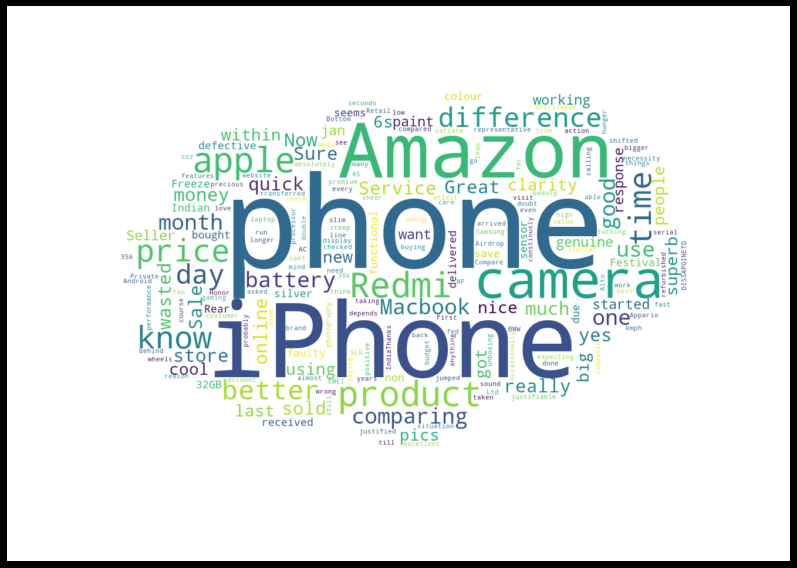

In [279]:
import numpy as np
mask = np.array(Image.open('/home/deep/Desktop/Scraping project/ecommerce_scraper/static/background/cloud.png'))
# stopwords = set(STOPWORDS)
# transformed_mask = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)

# for i in range(len(mask)):
#     transformed_mask[i] = list(map(transform_format, mask[i]))

# font_path = '/home/deep/Desktop/Scraping project/ecommerce_scraper/static/background/font/Pumpkin Soup.ttf'
wc = WordCloud(width=600, height=350, background_color='white', mask=mask, stopwords=STOPWORDS).generate(str(txt))
plt.figure(figsize=(15,8), facecolor='k', edgecolor='k')
plt.imshow(wc, interpolation='bilinear') 
plt.axis('off')
plt.tight_layout()

In [272]:
dir(WordCloud)

['__array__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_generated',
 '_draw_contour',
 '_get_bolean_mask',
 'fit_words',
 'generate',
 'generate_from_frequencies',
 'generate_from_text',
 'process_text',
 'recolor',
 'to_array',
 'to_file',
 'to_html',
 'to_image',
 'to_svg']

In [274]:
help(WordCloud.to_html)

Help on function to_html in module wordcloud.wordcloud:

to_html(self)

